# Perform Customer Segmentation Analysis in a Bank Using k-means

<b> Download the dataset and load it into Python </b>

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# url path
file_url = 'https://raw.githubusercontent.com/TrainingByPackt/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'

<b> Read the CSV file </b>

In [3]:
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2.0


<b> You will be using the fourth and tenth columns (X3 and X9). Extract these </b>

In [4]:
X = df[['X3', 'X9']]

<b> Perform data standardization by instantiating a StandardScaler object </b>

In [5]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

<b> Analyze and define the optimal number of clusters </b>

In [6]:
clusters = pd.DataFrame()
inertia = []

In [7]:
clusters['cluster_range'] = range(1, 15)

In [8]:
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [9]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,2000.000000
1,2,1280.617612
2,3,767.694985
3,4,576.086134
4,5,443.899592
5,6,360.418261
6,7,291.398267
7,8,252.704796
8,9,219.789204
9,10,193.322526


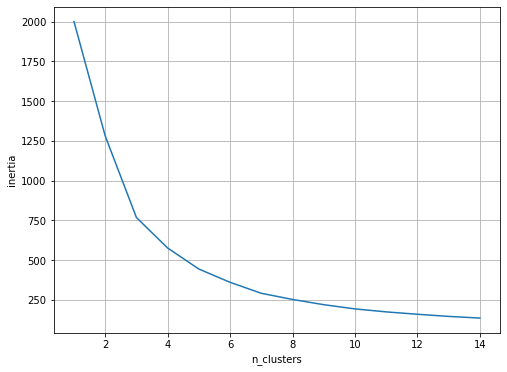

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(clusters.iloc[:, 0], clusters.iloc[:, 1])
plt.grid()
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [11]:
optim_clusters = 5

<b> Fit a k-means algorithm with the number of clusters you've defined </b>

In [12]:
kmeans = KMeans(random_state=1, n_clusters = optim_clusters, init='k-means++', n_init=50, max_iter=1000)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=5, n_init=50, random_state=1)

In [13]:
df['cluster'] = kmeans.predict(X_scaled)

<b> Create a scatter plot of the clusters </b>

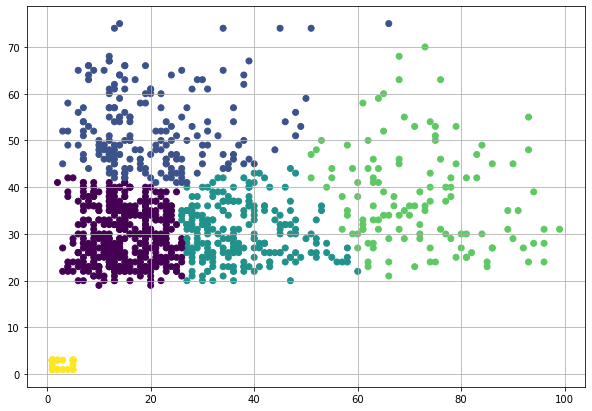

In [14]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(df.X3, df.X9, c=df.cluster)
plt.grid()
plt.show()